In [2]:
import sys
sys.path.insert(1, 'D:\Master\Blok3\AAS') #add path of toolbox

In [90]:
import numpy as np
from scipy import integrate, stats, interpolate
from toolbox import vis, fits
from toolbox import as_toolbox as ast
import urllib
import matplotlib.pyplot as plt
import importlib as il
from iminuit import Minuit
import toolbox
from scipy import optimize
from toolbox.ExternalFunctions import UnbinnedLH
import importlib
from sklearn.neighbors import KernelDensity

# Ex. 1

In [103]:
data = np.array([1,2,5,6,12,15,16,16,22,22,22,23])

def box_func(x_arr, x_center, h): 
    x_stop = x_center +h/2 
    x_start = x_center - h/2
    mask = (x_arr<x_stop) & (x_arr>x_start)
    y_arr = np.zeros_like(x_arr)
    y_arr[mask] = 1/h
    return y_arr

def gauss_kernel(x_arr, x_center, h):
    y_arr = np.zeros_like(x_arr)
    y_arr = stats.norm.pdf(x_arr, loc = x_center, scale = h)
    return y_arr

def lorentzian_kernel(x_arr, x_center, h):
    y_arr = np.zeros_like(x_arr)
    y_arr = stats.cauchy.pdf(x_arr, loc = x_center, scale = h)
    return y_arr

def KDE(data, h, kernel, xmin ,xmax):
    x_arr = np.linspace(xmin, xmax, 500)
    y_arr = np.zeros_like(x_arr,dtype=float)
    for i in range(len(data)):
        y_arr += kernel(x_arr, data[i], h)
    return x_arr,y_arr/len(data)

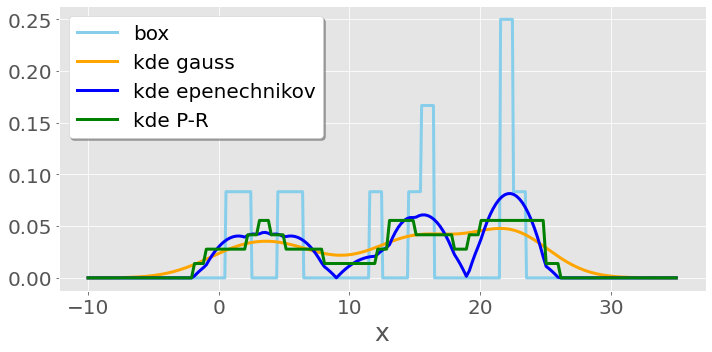

In [118]:
xmin, xmax = -10, 35
x, y = KDE(data, 1, box_func, xmin, xmax)
x_g, y_g = KDE(data, 3, gauss_kernel, xmin, xmax)
kernel = KernelDensity(bandwidth=3, kernel = 'gaussian')
kernel_e = KernelDensity(bandwidth=3, kernel = 'epanechnikov')
kernel_t = KernelDensity(bandwidth=3, kernel = 'tophat')

kernel.fit(data.reshape(-1,1))
kernel_e.fit(data.reshape(-1,1))
kernel_t.fit(data.reshape(-1,1))

X = np.linspace(xmin, xmax,200)
y_sk_g = kernel.score_samples(X[:,None])
y_e  = kernel_e.score_samples(X[:,None])
y_t  = kernel_t.score_samples(X[:,None])

#x_l, y_l = KDE(data, 1, lorentzian_kernel)
ax, fig = vis.nice_plot(x, y, show_plot=False, data_label='box')
#ax, fig = vis.nice_plot(x_g, y_g, show_plot=False, figure=fig, axis = ax, color = 'r', data_label='custom kde')
ax, fig = vis.nice_plot(X, np.exp(y_sk_g), show_plot=False, figure=fig, axis = ax, 
                        color = 'orange', data_label='kde gauss', plot_legend=True)

ax, fig = vis.nice_plot(X, np.exp(y_e), show_plot=False, figure=fig, axis = ax, 
                        color = 'blue', data_label='kde epenechnikov', plot_legend=True)
ax, fig = vis.nice_plot(X, np.exp(y_t), show_plot=False, figure=fig, axis = ax, 
                        color = 'green', data_label='kde P-R', plot_legend=True)



#ax, fig = vis.nice_plot(x_l, y_l, show_plot=False, figure=fig, axis = ax, color = 'orange')
fig

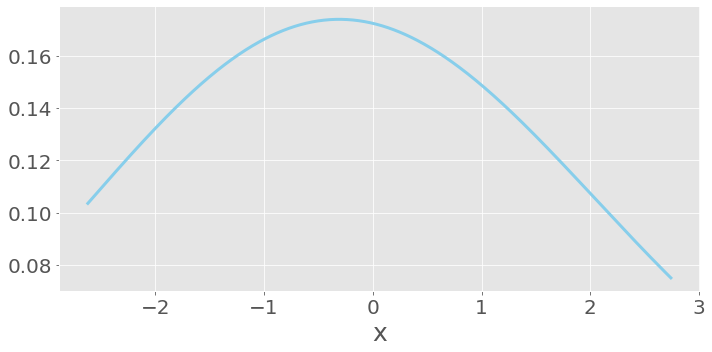

(<AxesSubplot:xlabel='x'>, <Figure size 720x360 with 1 Axes>)

In [78]:
#generate data
data = stats.norm.rvs(size = (10))
x, y = KDE(data, 2, gauss_kernel)
vis.nice_plot(x, y, show_plot=True)